In [6]:
import agents
import game
import mechanisms

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch

In [7]:
import importlib
importlib.reload(agents)
importlib.reload(game)
importlib.reload(mechanisms)

<module 'mechanisms' from 'C:\\Users\\billz\\PycharmProjects\\CS_281\\Finding_Friends\\mechanisms.py'>

In [8]:
NUM_PLAYERS = 4
BASE_LVL = 0
LVL_CAP = 10
WIN_PROB = 1.0
SAMPLE = mechanisms.sample_bernoulli

# skill_levels = np.array([1, 2, 3, 4, 5])
skill_levels = np.random.randint(1, 5, size=NUM_PLAYERS)
skill_levels = skill_levels / np.sum(skill_levels)
print(skill_levels)

# ff_mech = mechanisms.Baseline_Mechanism(num_players=NUM_PLAYERS, sample=SAMPLE, p=WIN_PROB)
ff_mech = mechanisms.Skill_Mechanism(num_players=NUM_PLAYERS, sample=SAMPLE, skill_levels=skill_levels)

ff_agents = [agents.Basic_Agent(i, BASE_LVL) for i in range(NUM_PLAYERS - 1)]
# ff_agents.append(agents.Lowest_Level_Agent(NUM_PLAYERS - 2, BASE_LVL))
# ff_agents.append(agents.Lowest_Level_Agent(NUM_PLAYERS - 1, BASE_LVL))
ff_agents.append(agents.Beta_Binomial_Agent(NUM_PLAYERS - 1, BASE_LVL, skill=skill_levels[NUM_PLAYERS - 1], priors=(2, 5)))
# ff_agents.append(agents.Q_Agent(NUM_PLAYERS - 1, BASE_LVL, output_dim=ff_mech.output_dim()))

ff_game = game.Game(players=ff_agents, mechanism=ff_mech, cap=LVL_CAP, logging_level='DEBUG')

[0.11111111 0.22222222 0.33333333 0.33333333]


In [9]:
from tqdm import tqdm

NUM_TRIALS = 10000
results = []

In [10]:
for i in tqdm(range(NUM_TRIALS)):
    ff_game.play()
    results.append(ff_game.levels)
    ff_game.reset()

results = np.array(results)

100%|██████████| 10000/10000 [00:31<00:00, 312.94it/s]


In [11]:
ff_agents[-1].q

AttributeError: 'Beta_Binomial_Agent' object has no attribute 'q'

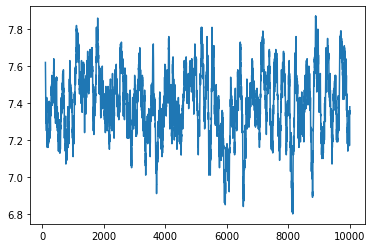

In [12]:
# plt.plot(results[:, 1])
means = torch.tensor(results[:, 1], dtype=torch.float).unfold(0, 100, 1).mean(1).view(-1)
# means = torch.cat((torch.zeros(99), means))
plt.plot(np.arange(100, 100 + len(means)), means.numpy())
plt.show()

In [ ]:
# plt.plot(results[:, -1])
means = torch.tensor(results[:, -1], dtype=torch.float).unfold(0, 100, 1).mean(1).view(-1)
# means = torch.cat((torch.zeros(99), means))
plt.plot(np.arange(100, 100 + len(means)), means.numpy())
plt.show()

In [ ]:
np.sum([results[i][-1] >= LVL_CAP for i in range(len(results))]) / NUM_TRIALS

In [ ]:
window = 100

wins_2 = torch.tensor(results[:, -1]) >= LVL_CAP
wins_2 = wins_2.unfold(0, window, 1).sum(1)
wins_2 = wins_2.type(torch.FloatTensor)

In [ ]:
window = 100

wins_1 = torch.tensor(results[:, -1]) >= LVL_CAP
wins_1 = wins_1.unfold(0, window, 1).sum(1)
wins_1 = wins_1.type(torch.FloatTensor)

In [13]:
window = 100

wins = torch.tensor(results[:, -1]) >= LVL_CAP
wins = wins.unfold(0, window, 1).sum(1)
wins = wins.type(torch.FloatTensor)

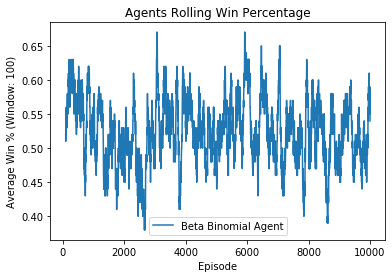

In [15]:
plt.plot(np.arange(window, window+len(wins)), (wins / window).numpy())
# plt.plot(np.arange(window, window+len(wins_1)), (wins_1 / window).numpy())
# plt.plot(np.arange(window, window+len(wins_2)), (wins_2 / window).numpy())
plt.legend(['Beta Binomial Agent', 'Lowest Level Agent', 'Basic Agent'])
plt.title('Agents Rolling Win Percentage')
plt.xlabel('Episode')
plt.ylabel('Average Win % (Window: 100)')
plt.show()

In [ ]:
ff_agents[-1].skill

In [ ]:
final_probs = ff_agents[-1].map_probs(NUM_PLAYERS)
final_probs = final_probs * (1 - ff_agents[-1].skill) / np.sum(final_probs)
final_probs[-1] = ff_agents[-1].skill
final_probs

In [ ]:
skill_levels